<h1><b>Assignment #5 - Hierarchical Clustering</b></h1>
Ryan Harris
<p><i>December 2020</i>

<hr>
<h2><b>Prepare Data for Analysis</b></h2>
<hr>

<h4><b><u>Load Dependencies</u></b></h4>

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import metrics

<h4><b><u>Import, Transform and Normalize Data</u></b></h4>

In [2]:
#Import
cer_df = pd.read_csv('//HARRISSERVER/share/School/Datasets/Cereals.csv')

#Remove cereals with missing values
cer_df = cer_df.dropna()

#Create copy of dataframe for normalization
cer_df_norm = cer_df.copy()


#Assign Continuous Columns to Normalize
cols_to_norm = ['calories','protein','fat','sodium','fiber','carbo','sugars','potass','vitamins','shelf','weight','cups','rating']

#Normalize only Coninuous Variables
scaler = preprocessing.StandardScaler()
cer_df_norm[cols_to_norm] = scaler.fit_transform(cer_df[cols_to_norm])
#Verify mean ~ 0 and std ~ 1
cer_df_norm.describe().transpose()[['mean','std']]

,mean,std
calories,-2.407984e-16,1.006826
protein,-5.476100e-17,1.006826
fat,0.000000e+00,1.006826
sodium,-7.351477e-17,1.006826
fiber,-8.401688e-17,1.006826
carbo,2.400482e-17,1.006826
sugars,1.012703e-17,1.006826
potass,-3.300663e-17,1.006826
vitamins,1.387779e-16,1.006826
shelf,0.000000e+00,1.006826


<h4><b><u>Determine Number of Clusters</u></b></h4>

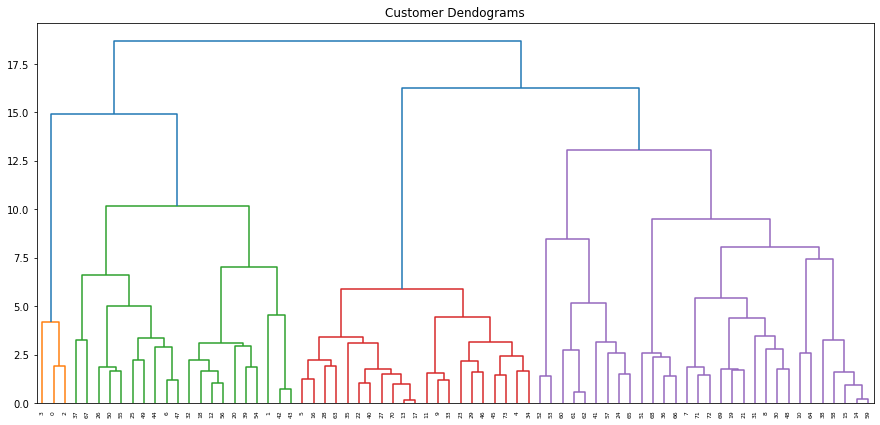

In [3]:
#Determine number of clusters
plt.figure(figsize=(15, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(cer_df_norm.iloc[:,3:], method='ward'))

<i><h4>How many clusters would you choose?</h4></i>
<p>Based on above, 5 clusters appears to be the ideal number (imaginary line drawn at about y = 11)

<h4><b><u>Apply Hierarchical Clustering (Single, Complete, Average, and Ward)</u></b></h4>

In [4]:
#cluster by single linkage and add cluster label to original dataset
single_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')
single_cluster.fit_predict(cer_df_norm.iloc[:,3:])
cer_df['single_cluster'] = single_cluster.labels_

#cluster by complete linkage and add cluster label to original dataset
complete_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
complete_cluster.fit_predict(cer_df_norm.iloc[:,3:])
cer_df['complete_cluster'] = complete_cluster.labels_

#cluster by average linkage and add cluster label to original dataset
average_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='average')
average_cluster.fit_predict(cer_df_norm.iloc[:,3:])
cer_df['average_cluster'] = average_cluster.labels_

#cluster by ward linkage and add cluster label to original dataset
ward_cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
ward_cluster.fit_predict(cer_df_norm.iloc[:,3:])
cer_df['ward_cluster'] = ward_cluster.labels_

#create dataframe for coefficients
coef_data = {'Method':['Single','Complete','Average','Ward'], 'Coefficient':[metrics.silhouette_score(cer_df_norm.iloc[:,3:], single_cluster.labels_),
                                                                             metrics.silhouette_score(cer_df_norm.iloc[:,3:], complete_cluster.labels_),
                                                                             metrics.silhouette_score(cer_df_norm.iloc[:,3:], average_cluster.labels_),
                                                                             metrics.silhouette_score(cer_df_norm.iloc[:,3:], ward_cluster.labels_)]}
coef_df = pd.DataFrame(data=coef_data)
print(coef_df)

     Method  Coefficient
0    Single     0.213979
1  Complete     0.219761
2   Average     0.180489
3      Ward     0.258006


<i><h4>Choose the best method</h4></i>
<p>Based on above, <b><u>Ward</b></u> is the best method as its coefficient is the highest.

<i><h4>Comment on the differences between hierachical clustering and K-Means</h4></i>
<p>Hierarchical clustering can be more useful than k-means when we don't know how many groups will ultimately be needed. Heirarchical clustering allows us to determine the groupings based on the data through the use of a dendogram.

<h4><b><u>Cluster Stability</u></b></h4>

<i>Placeholder</i>

<h4><b><u>Healthy Cereals</u></b></h4>

<i><h4>Should the data be normalized? If not, how should they be used in the cluster analysis?</h4></i>
<p>No, the data should not be normalized. I would look for high values in Protein, Fiber, Potassium, and Vitamins and low values in Fat, Sodium, Carbo, and Sugars. I would trim out Shelf, Weight, Cups, and Rating from the dataset.